In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import torchvision
import gdown
import tarfile
from shutil import copyfile
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset

In [2]:
celeba_images_path = '/content/celeba/img_align_celeba'
partition_file_path = '/content/celeba/list_eval_partition.txt'
flowers_images_path = '/content/flowers102/jpg'

In [3]:
file_id = '1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI'
destination = 'celeba.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

!unzip celeba.zip -d /content/celeba

Downloading...
From (original): https://drive.google.com/uc?id=1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI
From (redirected): https://drive.google.com/uc?id=1h_oR2jMJWO3JbIM63Oj2-2SjvnZkN3NI&confirm=t&uuid=b1a50051-ff23-4af2-94cb-c8211cdb4703
To: /content/celeba.zip
100%|██████████| 1.44G/1.44G [00:38<00:00, 37.3MB/s]


A streamkimeneten csak az utolsó 5000 sor látható.
 extracting: /content/celeba/img_align_celeba/197600.jpg  
 extracting: /content/celeba/img_align_celeba/197601.jpg  
 extracting: /content/celeba/img_align_celeba/197602.jpg  
 extracting: /content/celeba/img_align_celeba/197603.jpg  
 extracting: /content/celeba/img_align_celeba/197604.jpg  
 extracting: /content/celeba/img_align_celeba/197605.jpg  
 extracting: /content/celeba/img_align_celeba/197606.jpg  
 extracting: /content/celeba/img_align_celeba/197607.jpg  
 extracting: /content/celeba/img_align_celeba/197608.jpg  
 extracting: /content/celeba/img_align_celeba/197609.jpg  
 extracting: /content/celeba/img_align_celeba/197610.jpg  
 extracting: /content/celeba/img_align_celeba/197611.jpg  
 extracting: /content/celeba/img_align_celeba/197612.jpg  
 extracting: /content/celeba/img_align_celeba/197613.jpg  
 extracting: /content/celeba/img_align_celeba/197614.jpg  
 extracting: /content/celeba/img_align_celeba/197615.jpg  
 extr

In [4]:
file_id = '1ntYY__wPA50wd_zxwIw_h-TnfvWuXrKp'
destination = '/content/celeba/list_eval_partition.txt'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ntYY__wPA50wd_zxwIw_h-TnfvWuXrKp
To: /content/celeba/list_eval_partition.txt
100%|██████████| 2.84M/2.84M [00:00<00:00, 51.4MB/s]


'/content/celeba/list_eval_partition.txt'

In [5]:
file_id = '18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT'
destination = 'flowers102.tgz'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

output_dir = './flowers102'
os.makedirs(output_dir, exist_ok=True)

with tarfile.open(destination) as tar:
    tar.extractall(path=output_dir)

Downloading...
From (original): https://drive.google.com/uc?id=18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT
From (redirected): https://drive.google.com/uc?id=18-Lq0PpRpfiNHV7CozqDQUbH1iTrtnMT&confirm=t&uuid=b7942c44-d860-439a-a497-1434b4df40bf
To: /content/flowers102.tgz
100%|██████████| 345M/345M [00:08<00:00, 39.9MB/s]


In [6]:
file_id = '1ekVLhSiTgDiQAj76d3JxRrepq7nZvh_L'
destination = '/content/flowers102/setid.mat'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ekVLhSiTgDiQAj76d3JxRrepq7nZvh_L
From (redirected): https://drive.google.com/uc?id=1ekVLhSiTgDiQAj76d3JxRrepq7nZvh_L&confirm=t&uuid=166059b5-0d3e-490a-8a5f-5f6d281c6cc0
To: /content/flowers102/setid.mat
100%|██████████| 15.0k/15.0k [00:00<00:00, 35.9MB/s]


'/content/flowers102/setid.mat'

In [7]:
import scipy.io

mat = scipy.io.loadmat('/content/flowers102/setid.mat')

print(mat.keys())

train_ids = mat['trnid'].flatten()
valid_ids = mat['valid'].flatten()
test_ids = mat['tstid'].flatten()

print("Training set IDs:", train_ids)
print("Validation set IDs:", valid_ids)
print("Testing set IDs:", test_ids)


dict_keys(['__header__', '__version__', '__globals__', 'trnid', 'valid', 'tstid'])
Training set IDs: [6765 6755 6768 ... 8026 8036 8041]
Validation set IDs: [6773 6767 6739 ... 8028 8008 8030]
Testing set IDs: [6734 6735 6737 ... 8044 8045 8047]


In [8]:
os.makedirs('/content/flowers102/train', exist_ok=True)
os.makedirs('/content/flowers102/val', exist_ok=True)
os.makedirs('/content/flowers102/test', exist_ok=True)

def copy_images(set_ids, source_folder, target_folder):
    for img_id in set_ids:

        file_name = f'image_{img_id:05d}.jpg'

        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        if os.path.exists(source_path):
            copyfile(source_path, target_path)
        else:
            print(f"File not found: {source_path}")

copy_images(train_ids, flowers_images_path, '/content/flowers102/train')
copy_images(valid_ids, flowers_images_path, '/content/flowers102/val')
copy_images(test_ids, flowers_images_path, '/content/flowers102/test')

print("Images have been successfully split!")

Képek sikeresen felosztva!


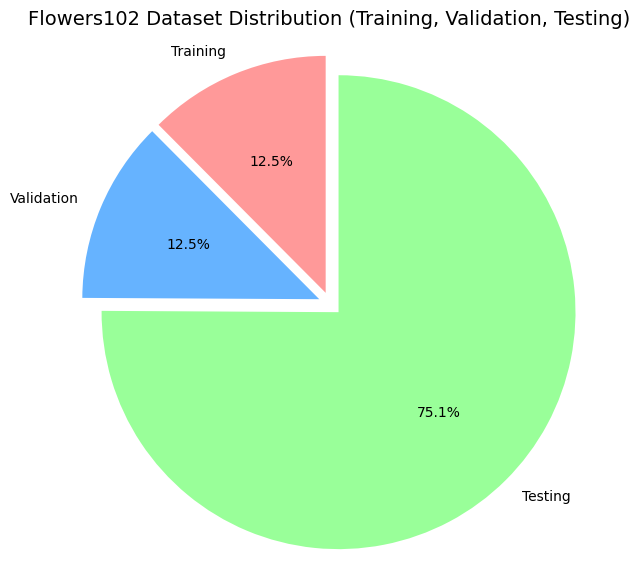

In [9]:
import matplotlib.pyplot as plt

train_size = len(train_ids)
valid_size = len(valid_ids)
test_size = len(test_ids)

sizes = [train_size, valid_size, test_size]
labels = ['Training', 'Validation', 'Testing']
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05, 0.05))

plt.axis('equal')

plt.title('Flowers102 Dataset Distribution (Training, Validation, Testing)', fontsize=14)

plt.show()


In [10]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [11]:
celeba_data = datasets.ImageFolder(root='/content/celeba', transform=transform)
celeba_loader = DataLoader(celeba_data, batch_size=64, shuffle=True)

flowers_data = datasets.ImageFolder(root='/content/flowers102', transform=transform)
flowers_loader = DataLoader(flowers_data, batch_size=64, shuffle=True)

In [12]:
celeba_data_iter = iter(celeba_loader)
images, labels = next(celeba_data_iter)
print(images.shape)

flowers_data_iter = iter(flowers_loader)
images, labels = next(flowers_data_iter)
print(images.shape)

torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])


In [13]:
partition_dict = {}
with open(partition_file_path, 'r') as file:
    for line in file.readlines():
        image_name, partition = line.strip().split()
        partition_dict[image_name] = int(partition)

In [14]:
class CelebADataset(Dataset):
    def __init__(self, root_dir, partition_dict, partition, transform=None):
        self.root_dir = root_dir
        self.partition_dict = partition_dict
        self.partition = partition
        self.transform = transform

        # Filter the image list based on the partition (0 for train, 1 for val, 2 for test)
        self.image_names = [img for img, p in partition_dict.items() if p == partition]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_names[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        label = self.partition_dict[self.image_names[idx]]

        return image, label

In [15]:
celeba_train_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=0, transform=transform)
celeba_val_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=1, transform=transform)
celeba_test_dataset = CelebADataset(root_dir=celeba_images_path, partition_dict=partition_dict, partition=2, transform=transform)

In [16]:
print(f'Train dataset size: {len(celeba_train_dataset)}')
print(f'Validation dataset size: {len(celeba_val_dataset)}')
print(f'Test dataset size: {len(celeba_test_dataset)}')

Train dataset size: 162770
Validation dataset size: 19867
Test dataset size: 19962


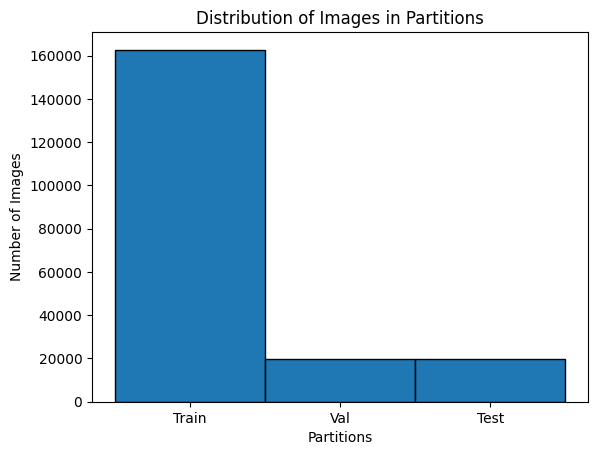

In [17]:
partitions = list(partition_dict.values())
plt.hist(partitions, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([0, 1, 2], ['Train', 'Val', 'Test'])
plt.xlabel('Partitions')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Partitions')
plt.show()

In [18]:
def check_image_validity(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return True
    except (IOError, SyntaxError):
        return False

invalid_images = [img for img in os.listdir(celeba_images_path) if not check_image_validity(os.path.join(celeba_images_path, img))]
print(f'Invalid CelebA images: {len(invalid_images)}')


Invalid CelebA images: 0


Images batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])


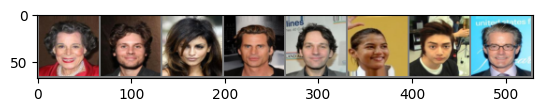

In [19]:
train_data_iter = iter(DataLoader(celeba_test_dataset, batch_size=64, shuffle=True))
images, labels = next(train_data_iter)

print(f'Images batch shape: {images.shape}')
print(f'Labels batch shape: {labels.shape}')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images[:8]))

In [20]:
celeba_train_loader = DataLoader(celeba_train_dataset, batch_size=64, shuffle=True)
celeba_val_loader = DataLoader(celeba_val_dataset, batch_size=64, shuffle=False)
celeba_test_loader = DataLoader(celeba_test_dataset, batch_size=64, shuffle=False)

In [22]:
data_iter = iter(celeba_train_loader)
images, labels = next(data_iter)

print(f'Images batch shape: {images.shape}')
print(f'Labels batch shape: {labels.shape}')

Images batch shape: torch.Size([64, 3, 64, 64])
Labels batch shape: torch.Size([64])
